<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df=pd.read_csv('diamond_data.csv')
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


Loaded the csv file Of diamond data and printed the first five observations

In [3]:
#Categorical Data-Encoding
cut_dummy=pd.get_dummies(df["cut"],drop_first=True)
color_dummy=pd.get_dummies(df["color"],drop_first=True)

In [4]:
cut_dummy

,Good,Ideal,Premium,Very Good
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1542,1,0,0,0
1543,0,1,0,0
1544,0,1,0,0
1545,0,0,0,1


In [5]:
color_dummy

,E,F,G,H,I,J
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1542,1,0,0,0,0,0
1543,0,0,1,0,0,0
1544,0,0,0,0,0,1
1545,0,0,0,1,0,0


Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df['y'].skew()

0.4383878452014628

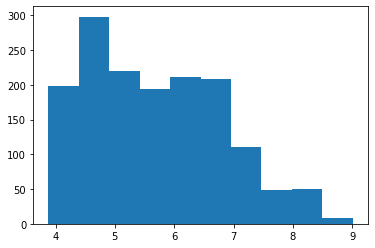

In [7]:
plt.hist(df['y'])
plt.show()

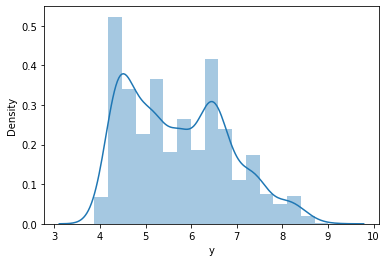

In [8]:
sns.distplot(df['y'])
plt.show()

##### INFERENCE:-Width of a Diamond in DIAMOND_DATA is POSITIVELY SKEWED(RIGHT SKEWED)

##### TRANSFORM USING BOXCOX:-

In [9]:
import scipy.stats as stats
df['y'],lam_rs=stats.boxcox(df['y'])

In [10]:
df['y'].skew()

0.033020411524122724

INFERENCE:-SKEWNESS DRASTICALLY REDUCED USING STATISTICAL TRANSFORM METHOD LIKE BOXCOX

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
import statsmodels.api as sm
x=pd.concat([df[["carat","depth","table","x","y","z"]],cut_dummy],axis=1)
y=df['price']
X=sm.add_constant(x)
ols_full=sm.OLS(y,X)
model=ols_full.fit()
model_residuals=model.resid
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:29:50   Log-Likelihood:                -13446.
No. Observations:                1547   AIC:                         2.691e+04
Df Residuals:                    1536   BIC:                         2.697e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.907e+04   1.12e+04      3.489      0.000    1.71e+04     6.1e+04
carat       8747.1883   1135.494      7.703      0.000    6519.906     1.1e+04
depth       -253.3970    119.760     -2.116      0.035    -488.307     -18.486
table        -36.6967     22.134     -1.658      0.098     -80.112       6.719
x           -283.2953    963.279     -0.294      0.769   -2172.775    1606.185
y          -3.115e+04   8968.370     -3.473      0.001   -4.87e+04   -1.36e+04
z           3818.5338   2229.837      1.712      0.087    -555.314    8192.381
Good         532.7252    260.849      2.042      0.041      21.067    1044.383
Ideal       1009.9432    261.986      3.855      0.000     496.055    1523.831
Premium      672.9392    252.367      2.667      0.008     177.920    1167.959
Very Good    905.4398    253.032      3.578      0.000     409.115    1401.764
==============================================================================
Omnibus:                      502.727   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4594.204
Skew:                           1.248   Prob(JB):                         0.00
Kurtosis:                      11.065   Cond. No.                     3.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fstatistics is Equal to Zero and less than 0.05 R**2<1,Hence The Model is Significant and we can Use This Model.

PLOTTING THE RESIDUALS:-

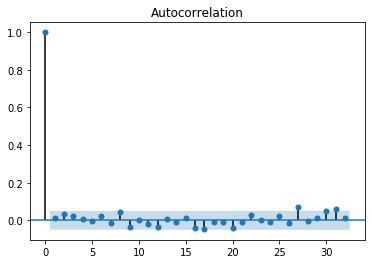

In [12]:
sm.graphics.tsa.plot_acf(x=model_residuals)
plt.show()

INFERENCE:-Some RESIDUALS Are Found in the AutoCorrelation PLOT.But There is No Higher variation,hence There Cannot be AUTO-CORRELATION,Which  We Can Also be  FIND BY DURBIN-WATSON TEST

DURBIN WATSON Test For AUTO CORRELATION
Assumption:
H0: The error terms are not autocorrelated
H1: The error terms are autocorrelated
Between 0 < a > 2-Positive autocorrelation
a= 2-No autocorrelation
Between 2 < a < 4-Negative autocorrelation

In [13]:
from statsmodels.stats.stattools import durbin_watson as dw
round(dw(model_residuals))

2.0

INFERENCE:-
No AutoCorrelation
and 
Not serially correlated

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#Recursive Feature Elimination
lr = LinearRegression()
rfe = RFE(estimator=lr) # , scoring='r2')
rfe_model = rfe.fit(x,y)
rfe_model.ranking_
rank= pd.DataFrame()
rank['Feature']=x.columns
rank['Feature_Rank']=rfe_model.ranking_
fea_r=rank[rank['Feature_Rank']==1]
fea_r

,Feature,Feature_Rank
0,carat,1
3,x,1
4,y,1
7,Ideal,1
9,Very Good,1


These Features best explains the price of a diamond with highest accuracy

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
from sklearn.model_selection import train_test_split as tt
xtr,xt,ytr,yt=tt(x,y,test_size=0.3,random_state=1)


In [16]:
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.model_selection import cross_val_score

df_k=KFold(n_splits=4)
for train,test in df_k.split(xtr):
 score=cross_val_score(lr,xtr,ytr,scoring='r2')


In [17]:
print('Coefficient of The Model is:',score.mean())

Coefficient of The Model is: 0.86773362995839


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
model.pvalues[model.pvalues>0.05 ].sort_values(ascending=False)

x        0.768725
table    0.097529
z        0.087012
dtype: float64

x,table,z varaibles(tstats Pval)>0.05 Hence This 3 Variables Are InSignificant

From The 3 variable The Most Insignificant Numerical Variable is 'x' Which We can Remove From The Model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

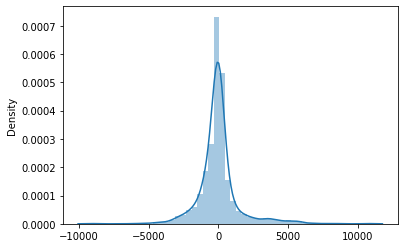

1.2489822728441546

In [19]:
# type your code here
sns.distplot(model_residuals,kde=True)
plt.show()
model_residuals.skew()

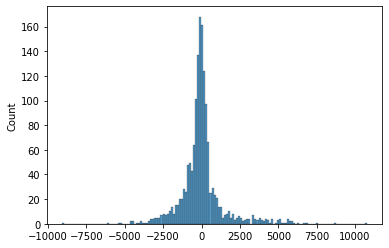

In [20]:
sns.histplot(model_residuals)
plt.show()

##### TEST OF NORMALITY:-

JARQUE_BERA

JARQUE-BERA TEST OF NORMALITY ASSUMPTION:- H0 : Skewness (S) = 0 and Kurtosis (K) = 0 DATA IS NORMAL,H1 : Skewness (S) ≠ 0 and Kurtosis(K) ≠ 0 DATA IS NOT NORMAL

In [21]:
from scipy.stats import jarque_bera
t,p=jarque_bera(model.resid)
print(p)
if p>0.05:
    print('Data Normal')
else:
    print('Data not normal')


0.0
Data not normal


SHAPIRO-WILK TEST TEST OF NORMALITY ASSUMPTION:- H0 : Skewness (S) = 0 and Kurtosis (K) = 0 DATA IS NORMAL,H1 : Skewness (S) ≠ 0 and Kurtosis(K) ≠ 0 DATA IS NOT NORMAL


In [22]:
ts,pv=stats.shapiro(model_residuals)
print(pv)
if pv>0.05:
    print('Data Normal')
else:
    print('Data not normal')


9.016385919392885e-38
Data not normal


INFERENCE:-FROM BOTH TEST OF NORMALITY IT IS FOUND THAT DATA IS NOT NORMAL

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

YES it is possible to make the residuals normal using Transformation(Non-Linear Methods)-Log,Square_Root

TRANSFORMATION:-

In [23]:
# type your code here
model_residuals=np.log(model_residuals)
ts,pv=stats.shapiro(model_residuals)
print(pv)
if pv>0.05:
 print('Data Normal')
else:
 print('Data not normal')


1.0
Data Normal


##### TRANSFORMED THE NOTNORMAL MODEL RESIDUALS TO NORMAL 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
rank=pd.DataFrame()
rank['Feature']=x.columns
rank['Feature_ranking']=rfe_model.ranking_
feature_rank=rank[rank['Feature_ranking']==1]['Feature']
feature_rank


0        carat
3            x
4            y
7        Ideal
9    Very Good
Name: Feature, dtype: object

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#RFE Model: 
lr=LinearRegression()
lr.fit(xtr[feature_rank],ytr)
ypred_train=lr.predict(xtr[feature_rank])
ypred_test=lr.predict(xt[feature_rank])
train_r2=r2_score(ytr, ypred_train)
test_r2=r2_score(yt, ypred_test)
train_mse=mean_squared_error(ytr, ypred_train) #Train mse
test_mse=mean_squared_error(yt, ypred_test) #test mse
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)


In [26]:
res_lr_RFE_7=[train_r2,test_r2,train_rmse,test_rmse]
res_lr_RFE_7
RFE_7_Res=pd.DataFrame()
RFE_7_Res['Recursive elimination']=res_lr_RFE_7
RFE_7_Res.index=['r2 train', 'r2 test', 'RMSE train', 'RMSE test']
RFE_7_Res


,Recursive elimination
r2 train,0.869424
r2 test,0.890945
RMSE train,1514.982193
RMSE test,1297.269199


RESIDUALS ELIMINATED FROM MODEL one-by-one to obtain the set of seven most significant variables USING RFE

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
X=sm.add_constant(color_dummy)
y=df["price"] 
model_color=sm.OLS(y,X).fit()
model_color.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           7.55e-07
Time:                        08:29:52   Log-Likelihood:                -15051.
No. Observations:                1547   AIC:                         3.012e+04
Df Residuals:                    1540   BIC:                         3.015e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3590.7087    283.805     12.652      0.000    3034.023    4147.395
E           -502.1820    373.622     -1.344      0.179   -1235.043     230.679
F              2.2073    375.635      0.006      0.995    -734.603     739.017
G            312.6099    364.537      0.858      0.391    -402.432    1027.652
H           1053.3814    385.418      2.733      0.006     297.382    1809.381
I           1326.7452    445.221      2.980      0.003     453.441    2200.049
J           1614.7079    527.327      3.062      0.002     580.353    2649.063
==============================================================================
Omnibus:                      447.468   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.050
Skew:                           1.626   Prob(JB):                    2.84e-220
Kurtosis:                       5.260   Cond. No.                         8.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FSTATS =0 AND LESS THAN 0.05.R**2<1.HENCE THE MODEL IS SIGNIFICANT AND WE CAN USE THIS MODEL

In [28]:
model_color.pvalues[model_color.pvalues>0.05]

E    0.179116
F    0.995312
G    0.391273
dtype: float64

E,F,G VARIABLES OF DIAMOND DATA TSTATS(PVAL)>0.05-THEY ARE INSIGNIFICANT FOR THE MODEL,HENCE THEY CAN BE REMOVED

E,F,G are insignificant columns in predicting price of diamond

In [29]:
color_dummy

,E,F,G,H,I,J
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1542,1,0,0,0,0,0
1543,0,0,1,0,0,0
1544,0,0,0,0,0,1
1545,0,0,0,1,0,0


In [30]:
x=color_dummy[['H','I','J']]
X=sm.add_constant(x)
y=df["price"] 
model_color=sm.OLS(y,X).fit()
model_color.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     11.07
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           3.42e-07
Time:                        08:29:52   Log-Likelihood:                -15054.
No. Observations:                1547   AIC:                         3.012e+04
Df Residuals:                    1543   BIC:                         3.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3552.2941    124.186     28.605      0.000    3308.703    3795.885
H           1091.7961    289.064      3.777      0.000     524.797    1658.795
I           1365.1598    365.145      3.739      0.000     648.928    2081.392
J           1653.1226    461.887      3.579      0.000     747.130    2559.116
==============================================================================
Omnibus:                      450.404   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1021.643
Skew:                           1.635   Prob(JB):                    1.42e-222
Kurtosis:                       5.270   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
from sklearn.feature_selection import RFE
#Recursive Feature Elimination
lr = LinearRegression()
rfe = RFE(estimator=lr) 
rfe_model = rfe.fit(x,y)
rfe_model.ranking_
rank= pd.DataFrame()
rank['Feature']=x.columns
rank['Feature_Rank']=rfe_model.ranking_
fea_r=rank[rank['Feature_Rank']==1]
fea_r

,Feature,Feature_Rank
2,J,1


Builded a Regression model on the five features obtained by eliminating the features recursively